In [10]:
from mesmerize import Transmission
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
t = Transmission.from_hdf5('/home/kushal/Sars_stuff/hier_all_promoters.ptrn')

In [3]:
t.df.columns

Index(['CurvePath', 'ImgInfoPath', 'ImgPath', 'ImgUUID', 'ROI_State',
       'SampleID', 'anatomical_location', 'cell_name', 'comments', 'date',
       'dorso_ventral_axis', 'misc', 'morphology', 'promoter',
       'rostro_caudal_axis', 'stimulus_name', 'uuid_curve', '_RAW_CURVE',
       'meta', 'stim_maps', '_BLOCK_', '_SPLICE_ARRAYS', '_NORMALIZE', '_RFFT',
       '_ABSOLUTE_VALUE', '_LOG_TRANSFORM', 'FCLUSTER_LABELS'],
      dtype='object')

In [36]:
X = np.vstack(t.df._RFFT.values)[:, :500]
X.shape

X = np.log10(np.abs(X))

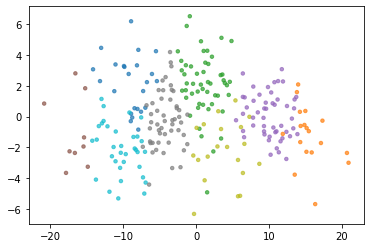

In [35]:
pca = PCA(n_components=2, svd_solver='full')

km = KMeans(n_clusters=8, n_init=10)

X_ = pca.fit_transform(X)

km.fit_predict(X)

colors_column = 'cell_name'


colors = list(map(
    dict(
        zip(
            t.df[colors_column].unique(), 
            range(len(t.df[colors_column].unique()))
        )
    ).get, 
    t.df[colors_column]
))

colors = km.labels_

plt.scatter(X_[:, 0], X_[:, 1], c=colors, s=12, alpha=0.7, cmap='tab10')

In [39]:
pca.explained_variance_ratio_

array([0.39877665, 0.02900953])

In [25]:
from sklearn.metrics import davies_bouldin_score
from collections import OrderedDict

In [37]:
cluster_range = range(2, 15)

scores = OrderedDict.fromkeys(cluster_range)

for nc in tqdm(cluster_range):
    km = KMeans(n_clusters=nc, n_init=10)
    km.fit_predict(X)
    score = davies_bouldin_score(X, km.labels_)
    
    scores[nc] = score

100%|██████████| 13/13 [00:00<00:00, 23.13it/s]


Text(0.5, 1.0, 'KMeans, DB Score, n_clusters = x + 2')

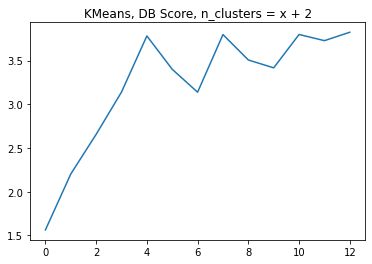

In [46]:
plt.plot(list(scores.values()))
plt.title("KMeans, DB Score, n_clusters = x + 2")

In [48]:
scores

OrderedDict([(2, 1.5637392895127116),
             (3, 2.202870314060011),
             (4, 2.6562960794228703),
             (5, 3.1400502043720167),
             (6, 3.781347323661034),
             (7, 3.399994340798931),
             (8, 3.138156475380468),
             (9, 3.7969347812504117),
             (10, 3.5065535948006192),
             (11, 3.416567316881105),
             (12, 3.7978665671855665),
             (13, 3.7276404327888994),
             (14, 3.8236152508051497)])

In [31]:
import seaborn as sns

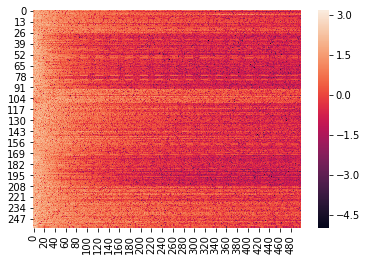

In [33]:
sns.heatmap(np.log10(np.abs(X)))

# Neuronal cells only

In [40]:
df_neuronal = t.df[~t.df.cell_name.isin(['cesa-pos', 'hnk1-pos', 'ependymal'])]
df_neuronal.cell_name.unique()

array(['pnin', 'palp', 'atena', 'pr', 'amg', 'ddn', 'pr_rn', 'eminens',
       'rten', 'atenp', 'antenal_relay', 'vac_in', 'pr_tract_interneuron',
       'pbv_pnin', 'dcen', 'cor_ass_bvin', 'pr_amg', 'mn'], dtype=object)

In [41]:
X_n = np.vstack(df_neuronal._RFFT.values)[:, :500]
X_n.shape

X_n = np.log10(np.abs(X_n))

X_n += np.abs(X_n.min())

In [42]:
cluster_range = range(2, 15)

scores_neuronal = OrderedDict.fromkeys(cluster_range)

for nc in tqdm(cluster_range):
    km = KMeans(n_clusters=nc, n_init=10)
    km.fit_predict(X_n)
    score = davies_bouldin_score(X_n, km.labels_)
    
    scores_neuronal[nc] = score

100%|██████████| 13/13 [00:00<00:00, 31.77it/s]


Text(0.5, 1.0, 'KMeans only Neuronal, DB Score, n_clusters = x + 2')

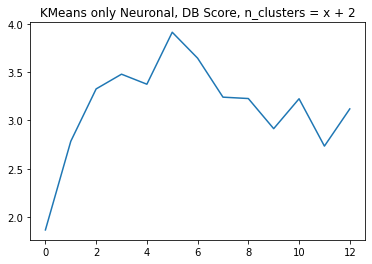

In [47]:
plt.plot(list(scores_neuronal.values()))
plt.title("KMeans only Neuronal, DB Score, n_clusters = x + 2")